![jon-tyson-A-obUh61bKw-unsplash.jpg](attachment:jon-tyson-A-obUh61bKw-unsplash.jpg width = 500)

# Microsoft Movie Analysis

**Authors:** Volha Puzikava
***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df3 = pd.read_csv('zippedData/tmdb.movies.csv.gz')
df3.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [3]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [4]:
df3 = df3.loc[:, ['release_date', 'title', 'vote_average']]
df3['release_date'] = df3.release_date.map(lambda x: x[:4])
df3 = df3.sort_values('release_date', ascending = False)
df3

,release_date,title,vote_average
26057,2020,Murdery Christmas,0.0
24384,2019,Piercing,5.9
25429,2019,Bilby,5.0
24933,2019,Late Afternoon,7.7
24764,2019,Holiday,5.5
...,...,...,...
11192,1946,The Best Years of Our Lives,7.8
26345,1939,How Walt Disney Cartoons Are Made,7.3
3580,1936,Le Bonheur,8.7
21758,1933,The Vampire Bat,5.6


In [5]:
df3['release_date'] = df3['release_date'].astype(str).astype(int)
df3 = df3[(df3['release_date'] >= 2010)]
df3

,release_date,title,vote_average
26057,2020,Murdery Christmas,0.0
24384,2019,Piercing,5.9
25429,2019,Bilby,5.0
24933,2019,Late Afternoon,7.7
24764,2019,Holiday,5.5
...,...,...,...
1675,2010,No Fun City,4.3
1729,2010,Mountains That Take Wing: Angela Davis & Yuri ...,6.0
1731,2010,Unrequited Love,6.0
1640,2010,Deuce of Spades,5.3


In [6]:
df3_renamed = df3.rename(columns = {'title' : 'movie', 'release_date' : 'year', 'vote_average' : 'rating'})
df3_renamed

,year,movie,rating
26057,2020,Murdery Christmas,0.0
24384,2019,Piercing,5.9
25429,2019,Bilby,5.0
24933,2019,Late Afternoon,7.7
24764,2019,Holiday,5.5
...,...,...,...
1675,2010,No Fun City,4.3
1729,2010,Mountains That Take Wing: Angela Davis & Yuri ...,6.0
1731,2010,Unrequited Love,6.0
1640,2010,Deuce of Spades,5.3


In [7]:
df4 = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
df4.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [8]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [9]:
df4 = df4.loc[:, ['release_date', 'movie', 'production_budget', 'worldwide_gross']]
df4['release_date'] = df4.release_date.map(lambda x: x[7:])
df4 = df4.sort_values('release_date', ascending = False)
df4

,release_date,movie,production_budget,worldwide_gross
3633,2019,The Best of Enemies,"$10,000,000","$10,205,616"
3915,2019,El Chicano,"$8,000,000","$700,261"
580,2019,The Secret Life of Pets 2,"$80,000,000","$113,351,496"
496,2019,Shazam!,"$85,000,000","$362,899,733"
95,2019,Captain Marvel,"$175,000,000","$1,123,061,550"
...,...,...,...,...
4984,1927,Wings,"$2,000,000",$0
5606,1925,The Big Parade,"$245,000","$22,000,000"
4569,1925,Ben-Hur: A Tale of the Christ,"$3,900,000","$9,000,000"
5683,1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000"


In [10]:
df4.duplicated().value_counts()

False    5782
dtype: int64

In [11]:
df4['release_date'] = df4['release_date'].astype(str).astype(int)
df4 = df4[df4['release_date'] >= 2010]
df4

,release_date,movie,production_budget,worldwide_gross
3633,2019,The Best of Enemies,"$10,000,000","$10,205,616"
3915,2019,El Chicano,"$8,000,000","$700,261"
580,2019,The Secret Life of Pets 2,"$80,000,000","$113,351,496"
496,2019,Shazam!,"$85,000,000","$362,899,733"
95,2019,Captain Marvel,"$175,000,000","$1,123,061,550"
...,...,...,...,...
4572,2010,The Good Heart,"$3,800,000","$340,930"
2352,2010,Faster,"$24,000,000","$35,792,945"
5309,2010,Zombies of Mass Destruction,"$1,000,000",$0
3711,2010,Welcome to the Rileys,"$10,000,000","$355,919"


In [12]:
df4_renamed = df4.rename(columns = {'release_date' : 'year'})
df4_renamed

,year,movie,production_budget,worldwide_gross
3633,2019,The Best of Enemies,"$10,000,000","$10,205,616"
3915,2019,El Chicano,"$8,000,000","$700,261"
580,2019,The Secret Life of Pets 2,"$80,000,000","$113,351,496"
496,2019,Shazam!,"$85,000,000","$362,899,733"
95,2019,Captain Marvel,"$175,000,000","$1,123,061,550"
...,...,...,...,...
4572,2010,The Good Heart,"$3,800,000","$340,930"
2352,2010,Faster,"$24,000,000","$35,792,945"
5309,2010,Zombies of Mass Destruction,"$1,000,000",$0
3711,2010,Welcome to the Rileys,"$10,000,000","$355,919"


In [63]:
import sqlite3
conn = sqlite3.connect('zippedData/im.db')
cur = conn.cursor()
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")
table_names = cur.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [64]:
p = """
SELECT mb.primary_title AS movie, 
       mb.genres AS genre, 
       mb.start_year AS year, 
       mr.averagerating AS rating, 
       p.primary_name AS director
FROM movie_basics AS mb
JOIN movie_ratings AS mr
    USING(movie_id)
JOIN directors as d
    USING(movie_id)
JOIN persons AS p
    USING(person_id)
ORDER BY start_year DESC;
"""
df5 = pd.read_sql(p, conn)
df5

,movie,genre,year,rating,director
0,One Day Before the Rainy Season,"Biography,Drama",2019,7.2,Mani Kaul
1,On kadin,Drama,2019,7.1,Serif Gören
2,Abolição,Documentary,2019,7.4,Zózimo Bulbul
3,Alita: Battle Angel,"Action,Adventure,Sci-Fi",2019,7.5,Robert Rodriguez
4,Alita: Battle Angel,"Action,Adventure,Sci-Fi",2019,7.5,Robert Rodriguez
...,...,...,...,...,...
181382,Hatchet Sisters,Horror,2010,5.4,Joe Black
181383,Hatchet Sisters,Horror,2010,5.4,Joe Black
181384,Hatchet Sisters,Horror,2010,5.4,Joe Black
181385,Peculiar Pets,Documentary,2010,6.4,Adrian Cale


In [65]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181387 entries, 0 to 181386
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   movie     181387 non-null  object 
 1   genre     180047 non-null  object 
 2   year      181387 non-null  int64  
 3   rating    181387 non-null  float64
 4   director  181387 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 6.9+ MB


In [66]:
duplicates = df5[df5.duplicated()]
duplicates

,movie,genre,year,rating,director
4,Alita: Battle Angel,"Action,Adventure,Sci-Fi",2019,7.5,Robert Rodriguez
5,Alita: Battle Angel,"Action,Adventure,Sci-Fi",2019,7.5,Robert Rodriguez
8,Shazam!,"Action,Adventure,Comedy",2019,7.4,David F. Sandberg
9,Shazam!,"Action,Adventure,Comedy",2019,7.4,David F. Sandberg
10,Shazam!,"Action,Adventure,Comedy",2019,7.4,David F. Sandberg
...,...,...,...,...,...
181372,Mago Digo Dai,Comedy,2010,7.2,Sri Lal Priyadeva
181380,Hatchet Sisters,Horror,2010,5.4,Jeremy Tidwell
181381,Hatchet Sisters,Horror,2010,5.4,Jeremy Tidwell
181383,Hatchet Sisters,Horror,2010,5.4,Joe Black


In [67]:
df5 = df5.drop_duplicates()
df5

,movie,genre,year,rating,director
0,One Day Before the Rainy Season,"Biography,Drama",2019,7.2,Mani Kaul
1,On kadin,Drama,2019,7.1,Serif Gören
2,Abolição,Documentary,2019,7.4,Zózimo Bulbul
3,Alita: Battle Angel,"Action,Adventure,Sci-Fi",2019,7.5,Robert Rodriguez
6,Surviving in L.A.,"Comedy,Drama,Romance",2019,8.7,Abbi Lake O'Neill
...,...,...,...,...,...
181378,Setteekh,"Horror,Mystery,Thriller",2010,5.1,Evgeniy Pavlov
181379,Hatchet Sisters,Horror,2010,5.4,Jeremy Tidwell
181382,Hatchet Sisters,Horror,2010,5.4,Joe Black
181385,Peculiar Pets,Documentary,2010,6.4,Adrian Cale


In [68]:
df5.isna().sum()

movie         0
genre       798
year          0
rating        0
director      0
dtype: int64

In [69]:
df5_filled = df5.fillna({'genre': 'Unknown'})
df5_filled 

,movie,genre,year,rating,director
0,One Day Before the Rainy Season,"Biography,Drama",2019,7.2,Mani Kaul
1,On kadin,Drama,2019,7.1,Serif Gören
2,Abolição,Documentary,2019,7.4,Zózimo Bulbul
3,Alita: Battle Angel,"Action,Adventure,Sci-Fi",2019,7.5,Robert Rodriguez
6,Surviving in L.A.,"Comedy,Drama,Romance",2019,8.7,Abbi Lake O'Neill
...,...,...,...,...,...
181378,Setteekh,"Horror,Mystery,Thriller",2010,5.1,Evgeniy Pavlov
181379,Hatchet Sisters,Horror,2010,5.4,Jeremy Tidwell
181382,Hatchet Sisters,Horror,2010,5.4,Joe Black
181385,Peculiar Pets,Documentary,2010,6.4,Adrian Cale


In [70]:
df5['genre'] = df5_filled['genre'].tolist()
df5['genre'] = df5_filled['genre'].map(lambda x: x.split(','))
df5.explode('genre')

<ipython-input-70-fe0a13c7ed49>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['genre'] = df5_filled['genre'].tolist()
<ipython-input-70-fe0a13c7ed49>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['genre'] = df5_filled['genre'].map(lambda x: x.split(','))


,movie,genre,year,rating,director
0,One Day Before the Rainy Season,Biography,2019,7.2,Mani Kaul
0,One Day Before the Rainy Season,Drama,2019,7.2,Mani Kaul
1,On kadin,Drama,2019,7.1,Serif Gören
2,Abolição,Documentary,2019,7.4,Zózimo Bulbul
3,Alita: Battle Angel,Action,2019,7.5,Robert Rodriguez
...,...,...,...,...,...
181378,Setteekh,Thriller,2010,5.1,Evgeniy Pavlov
181379,Hatchet Sisters,Horror,2010,5.4,Jeremy Tidwell
181382,Hatchet Sisters,Horror,2010,5.4,Joe Black
181385,Peculiar Pets,Documentary,2010,6.4,Adrian Cale


In [71]:
new_df = df5.merge(df3_renamed, on = ['year', 'movie', 'rating']).merge(df4_renamed, on = ['year', 'movie']).explode('genre')
new_df

,movie,genre,year,rating,director,production_budget,worldwide_gross
0,Tomb Raider,Action,2018,6.3,Roar Uthaug,"$90,000,000","$273,477,501"
0,Tomb Raider,Adventure,2018,6.3,Roar Uthaug,"$90,000,000","$273,477,501"
0,Tomb Raider,Fantasy,2018,6.3,Roar Uthaug,"$90,000,000","$273,477,501"
1,Hell Fest,Horror,2018,5.5,Gregory Plotkin,"$5,500,000","$18,119,231"
2,The Sisters Brothers,Adventure,2018,7.0,Jacques Audiard,"$38,000,000","$13,143,056"
...,...,...,...,...,...,...,...
161,Country Strong,Music,2010,6.3,Shana Feste,"$15,000,000","$20,601,987"
162,The Christmas Bunny,Drama,2010,6.1,Tom Seidman,"$250,000",$0
162,The Christmas Bunny,Family,2010,6.1,Tom Seidman,"$250,000",$0
163,The Virginity Hit,Comedy,2010,4.6,Andrew Gurland,"$2,000,000","$636,706"


In [72]:
gross_genre = new_df[['genre', 'worldwide_gross']]
gross_genre

,genre,worldwide_gross
0,Action,"$273,477,501"
0,Adventure,"$273,477,501"
0,Fantasy,"$273,477,501"
1,Horror,"$18,119,231"
2,Adventure,"$13,143,056"
...,...,...
161,Music,"$20,601,987"
162,Drama,$0
162,Family,$0
163,Comedy,"$636,706"


In [76]:
gross_genre["worldwide_gross"] = gross_genre["worldwide_gross"].replace("[$,]", "", regex=True).astype(int)
gross_genre_new = gross_genre.groupby(['genre'])['worldwide_gross'].mean().sort_values(ascending = True)
gross_genre_new

<ipython-input-76-32ce7a09807b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gross_genre["worldwide_gross"] = gross_genre["worldwide_gross"].replace("[$,]", "", regex=True).astype(int)


genre
Documentary    7.712436e+06
Music          9.124764e+06
War            4.340352e+07
Sport          4.835648e+07
Romance        6.490569e+07
Crime          7.799637e+07
Drama          7.987591e+07
Horror         8.173075e+07
Biography      8.386885e+07
Thriller       9.185368e+07
Mystery        9.507077e+07
History        1.261628e+08
Family         1.879096e+08
Comedy         1.931360e+08
Action         2.607188e+08
Fantasy        2.690376e+08
Sci-Fi         3.136402e+08
Adventure      3.945403e+08
Animation      5.785690e+08
Name: worldwide_gross, dtype: float64

<AxesSubplot:title={'center':'Worldwide Gross for Movie Genres'}, ylabel='genre'>

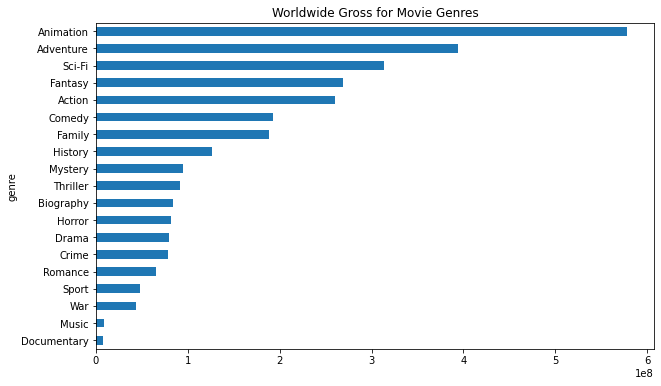

In [77]:
gross_genre_new.plot(kind = 'barh', figsize = (10,6), title = "Worldwide Gross for Movie Genres")

In [25]:
rating_director = new_df[['rating', 'director']]
rating_director

,rating,director
0,6.3,Roar Uthaug
0,6.3,Roar Uthaug
0,6.3,Roar Uthaug
1,5.5,Gregory Plotkin
2,7.0,Jacques Audiard
...,...,...
161,6.3,Shana Feste
162,6.1,Tom Seidman
162,6.1,Tom Seidman
163,4.6,Andrew Gurland


In [26]:
rating_director_new = rating_director.groupby(['director'])['rating'].mean().sort_values(ascending = True)
rating_director_new

director
Aaron T. Wells         3.5
Michael Hoffman Jr.    3.5
Roze                   3.6
Christian Sesma        3.8
Michael Winnick        4.2
                      ... 
Tate Taylor            8.1
Garth Davis            8.1
Martin Scorsese        8.1
Mel Gibson             8.1
Martin McDonagh        8.2
Name: rating, Length: 142, dtype: float64

<AxesSubplot:title={'center':'Rating of Movie Directors'}, ylabel='director'>

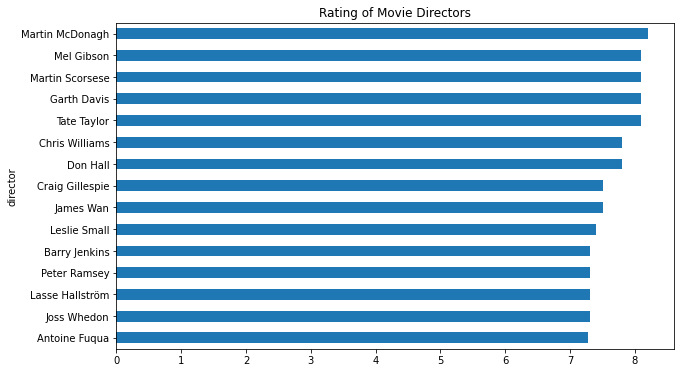

In [27]:
rating_director_new[-15:].plot(kind = 'barh', figsize = (10,6), title = "Rating of Movie Directors")

In [78]:
gross_director = new_df[['worldwide_gross', 'director']]
gross_director

,worldwide_gross,director
0,"$273,477,501",Roar Uthaug
0,"$273,477,501",Roar Uthaug
0,"$273,477,501",Roar Uthaug
1,"$18,119,231",Gregory Plotkin
2,"$13,143,056",Jacques Audiard
...,...,...
161,"$20,601,987",Shana Feste
162,$0,Tom Seidman
162,$0,Tom Seidman
163,"$636,706",Andrew Gurland


In [83]:
gross_director["worldwide_gross"] = gross_director["worldwide_gross"].replace("[$,]", "", regex=True).astype(int)
gross_director_new = gross_director.groupby(['director'])['worldwide_gross'].mean().sort_values(ascending = True)
gross_director_new

<ipython-input-83-2f265a8a0ab1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gross_director["worldwide_gross"] = gross_director["worldwide_gross"].replace("[$,]", "", regex=True).astype(int)


director
Aaron T. Wells     0.000000e+00
David Hackl        0.000000e+00
Michael Winnick    0.000000e+00
Christian Sesma    0.000000e+00
Benni Diez         0.000000e+00
                       ...     
Joachim Rønning    7.882411e+08
Eric Guillon       1.034728e+09
Pierre Coffin      1.097532e+09
Kyle Balda         1.097532e+09
Joss Whedon        1.403014e+09
Name: worldwide_gross, Length: 142, dtype: float64

<AxesSubplot:title={'center':'Gross of Movie Directors'}, ylabel='director'>

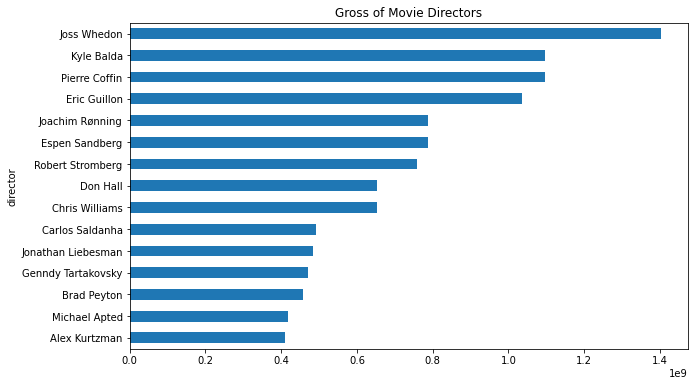

In [84]:
gross_director_new[-15:].plot(kind = 'barh', figsize = (10,6), title = "Gross of Movie Directors")

In [28]:
rating_budget = new_df[['rating', 'production_budget']]
rating_budget

,rating,production_budget
0,6.3,"$90,000,000"
0,6.3,"$90,000,000"
0,6.3,"$90,000,000"
1,5.5,"$5,500,000"
2,7.0,"$38,000,000"
...,...,...
161,6.3,"$15,000,000"
162,6.1,"$250,000"
162,6.1,"$250,000"
163,4.6,"$2,000,000"


In [48]:
rating_budget["production_budget"].replace("[$,]", "", regex=True).astype(int)
rating_budget_new = rating_budget.groupby(['production_budget'])['rating'].mean().sort_values(ascending = False)
rating_budget_new[:20]

production_budget
23000000     8.300000
165000000    7.800000
12000000     7.646154
11000000     7.500000
750000       7.400000
1500000      7.400000
330600000    7.300000
145000000    7.300000
80000000     7.260000
12500000     7.200000
37500000     7.100000
16000000     7.100000
40000000     7.042857
180000000    7.000000
22000000     6.900000
38000000     6.742857
55000000     6.733333
20000000     6.725000
13000000     6.700000
12800000     6.700000
Name: rating, dtype: float64

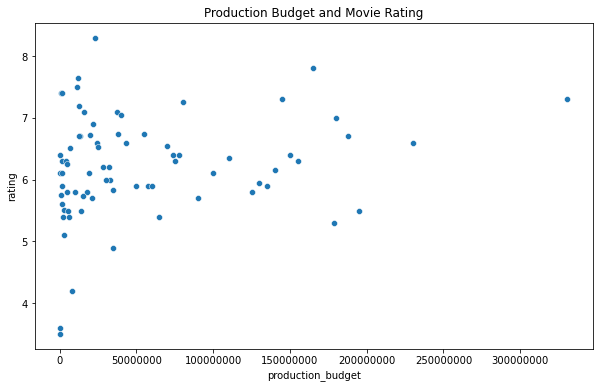

In [49]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.scatterplot(data = rating_budget_new).set(title = 'Production Budget and Movie Rating') 
#to avoid scientific notations:
ax.get_xaxis().get_major_formatter().set_scientific(False) 